In [2]:
# 1️⃣ Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2️⃣ Importer ton fichier depuis ton ordinateur
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]), encoding='latin1')


In [6]:
# 4️⃣ Afficher les premières lignes
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# 4️⃣ Informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# 5️⃣ Aperçu statistique des colonnes numériques
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# 6️⃣ Aperçu rapide des colonnes (noms)
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# 7️⃣ Dimensions du dataset (lignes, colonnes)
df.shape

(9994, 21)

In [11]:
# 🧹 2️⃣ Nettoyage et préparation du dataset

# 🔸 Convertir les colonnes de dates
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

In [12]:
# 🔸 Vérifier s’il y a des doublons
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


In [13]:
# 🔸 Vérifier s’il reste des valeurs manquantes
missing_values = df.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes : {missing_values}")

Nombre total de valeurs manquantes : 0


In [14]:
# 🔸 Vérifier les bornes de certaines colonnes clés
print("\nAperçu des valeurs numériques :")
print(df[["Sales", "Quantity", "Discount", "Profit"]].describe())


Aperçu des valeurs numériques :
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [15]:
df["Category"].unique()
df["Region"].unique()
df["Ship Mode"].value_counts()


,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


In [16]:
print("Ventes totales :", df["Sales"].sum())
print("Profit total :", df["Profit"].sum())
print("Quantité totale :", df["Quantity"].sum())


Ventes totales : 2297200.8603000003
Profit total : 286397.0217
Quantité totale : 37873


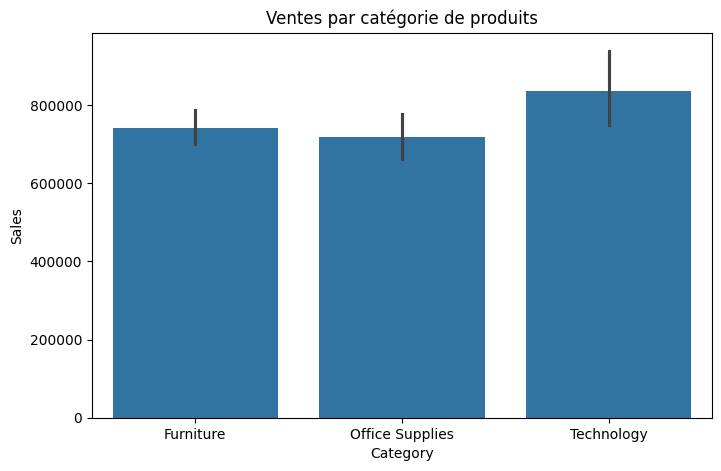

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Ventes par catégorie de produits")
plt.show()


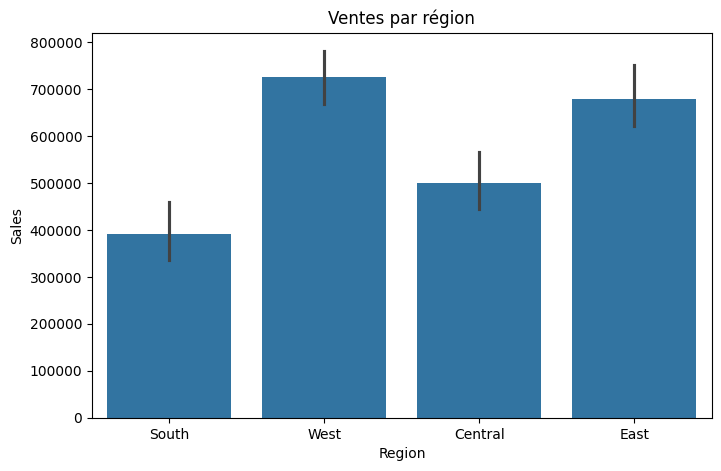

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Ventes par région")
plt.show()


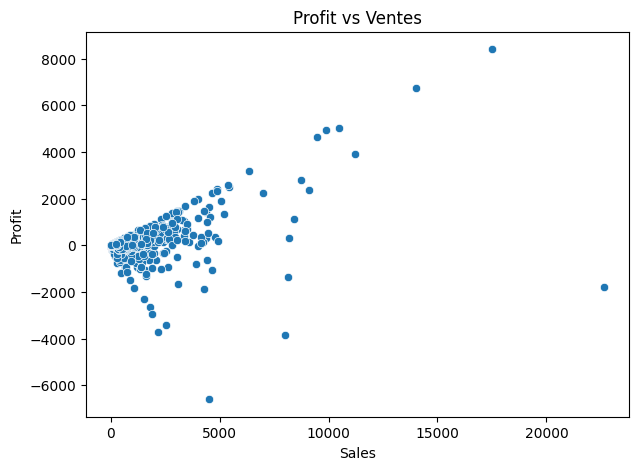

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Profit vs Ventes")
plt.show()


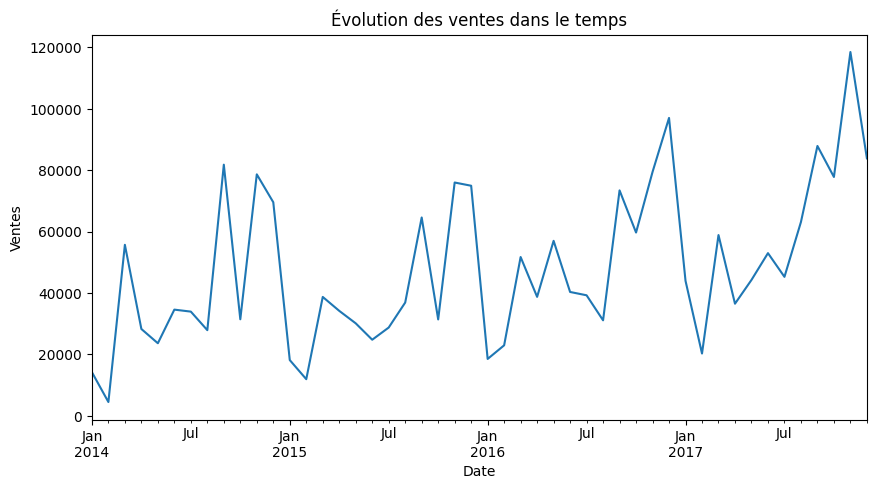

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["YearMonth"] = df["Order Date"].dt.to_period("M")
sales_over_time = df.groupby("YearMonth")["Sales"].sum()

sales_over_time.plot(figsize=(10,5))
plt.title("Évolution des ventes dans le temps")
plt.ylabel("Ventes")
plt.xlabel("Date")
plt.show()


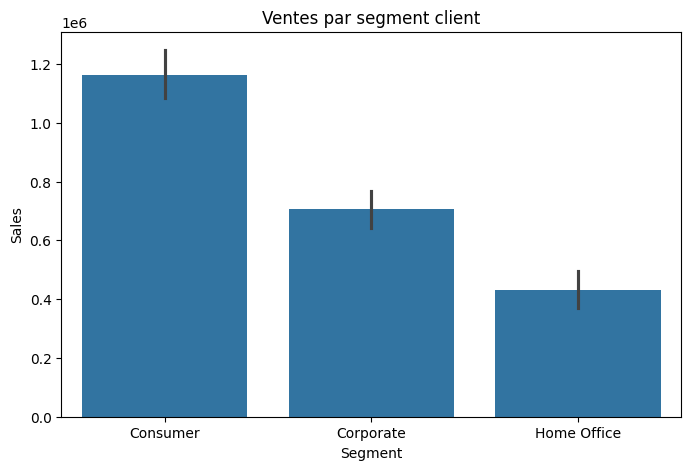

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Sales", data=df, estimator=sum)
plt.title("Ventes par segment client")
plt.show()


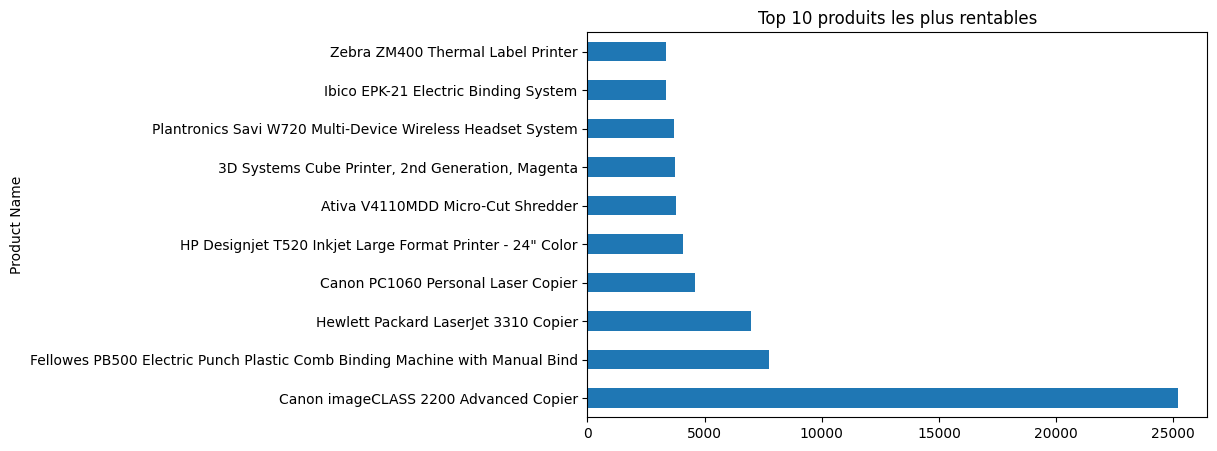

In [22]:
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 produits les plus rentables")
plt.show()


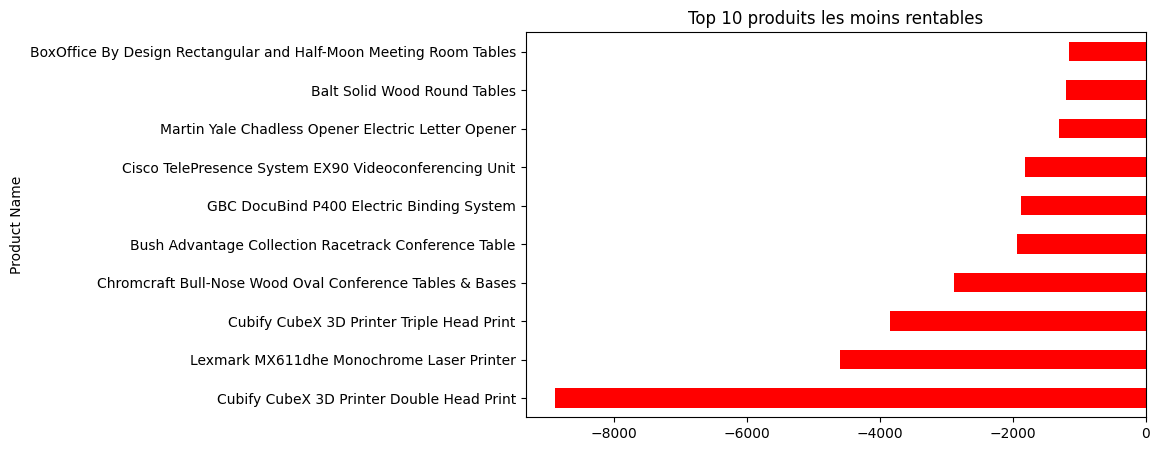

In [23]:
worst_products = df.groupby("Product Name")["Profit"].sum().sort_values().head(10)
worst_products.plot(kind="barh", figsize=(8,5), color="red")
plt.title("Top 10 produits les moins rentables")
plt.show()


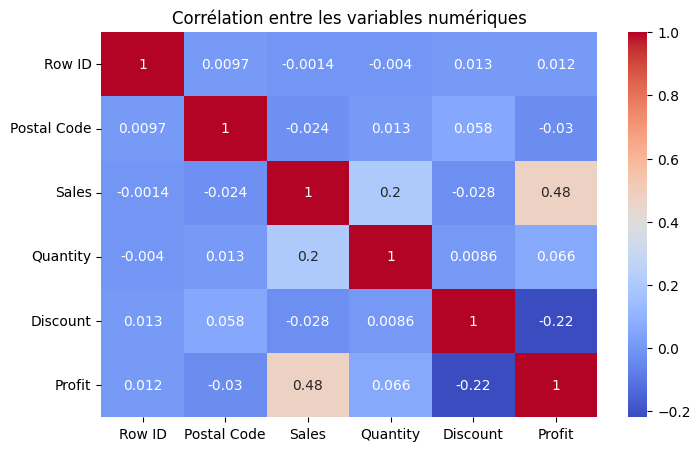

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables numériques")
plt.show()


In [25]:
# 6️⃣ Conclusion et insights
# ---------------------------------------------
print("""
💡 Insights principaux :

1. La catégorie 'Technology' génère le plus de ventes, mais aussi une forte variabilité de profit.
2. La région 'West' est la plus performante en volume de ventes.
3. Certaines remises trop fortes réduisent la rentabilité.
4. Les ventes augmentent régulièrement chaque fin d'année (effet saisonnier).
5. Certains produits très vendus génèrent des pertes -> optimisation possible.

🚀 Prochaine étape : automatiser ces visualisations dans Power BI ou Streamlit.
""")


💡 Insights principaux :

1. La catégorie 'Technology' génère le plus de ventes, mais aussi une forte variabilité de profit.
2. La région 'West' est la plus performante en volume de ventes.
3. Certaines remises trop fortes réduisent la rentabilité.
4. Les ventes augmentent régulièrement chaque fin d'année (effet saisonnier).
5. Certains produits très vendus génèrent des pertes -> optimisation possible.

🚀 Prochaine étape : automatiser ces visualisations dans Power BI ou Streamlit.

